Load and Explore the Dataset

In [112]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Salary_Data.csv")
df.head()


,Years of Experience,Salary
0,5.0,90000.0
1,3.0,65000.0
2,15.0,150000.0
3,7.0,60000.0
4,20.0,200000.0


In [113]:
df.describe()

,Years of Experience,Salary
count,6701.000000,6699.000000
mean,8.094687,115326.964771
std,6.059003,52786.183911
min,0.000000,350.000000
25%,3.000000,70000.000000
50%,7.000000,115000.000000
75%,12.000000,160000.000000
max,34.000000,250000.000000


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6701 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 104.9 KB


In [115]:
df.isnull()

,Years of Experience,Salary
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
6699,False,False
6700,False,False
6701,False,False
6702,False,False


In [116]:
df.dropna(inplace=True)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6699 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6699 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 157.0 KB


Feature Scaling(Very Important for svr)

SVR uses distance based calculations so scaling ensures all features condition equally

In [118]:
from sklearn.preprocessing import StandardScaler
x = df[['Years of Experience']].values
y = df[['Salary']].values

sc_x = StandardScaler()
sc_y = StandardScaler()

x_scaled = sc_x.fit_transform(x)
y_scaled = sc_y.fit_transform(y)

Flatten y for SVR

In [119]:
y_scaled = y_scaled.ravel()

In [120]:
y_scaled

array([-0.47983873, -0.95348286,  0.65690718, ..., -1.14294051,
        0.46744953, -1.52185581])

Train SVR Model(RBF Kernel)


In [121]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=100 ,epsilon=0.1)
svr.fit(x_scaled, y_scaled)

SVR(C=100)

Prediction and Inverse Scaling

In [122]:
y_pred_scaled = svr.predict(x_scaled)
y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1,1))

In [123]:
y_pred_scaled

array([-0.44592988, -0.95928686,  1.16101663, ..., -0.71943669,
        1.02434885, -1.33765207])

In [124]:
y_pred

array([[ 91789.78489284],
       [ 64693.65154467],
       [176608.02755474],
       ...,
       [ 77353.48189214],
       [169394.39541345],
       [ 44722.68696322]])

Visualization Actual vs Predicted

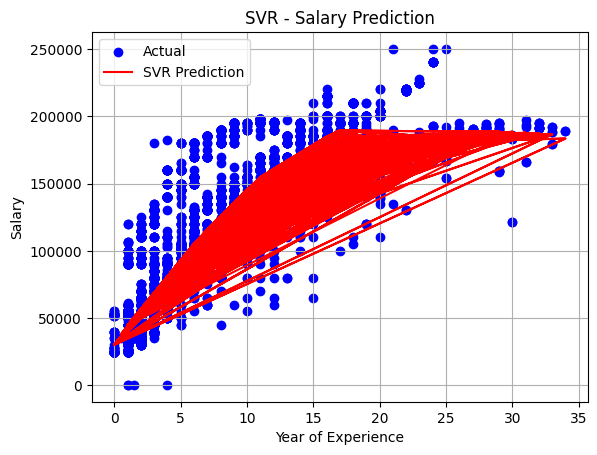

In [125]:
import matplotlib.pyplot as plt

plt.scatter(x,y, color='blue', label='Actual')
plt.plot(x,y_pred, label='SVR Prediction', color='red')
plt.title("SVR - Salary Prediction")
plt.xlabel("Year of Experience")
plt.ylabel("Salary")
plt.legend()
plt.grid(True)
plt.show()

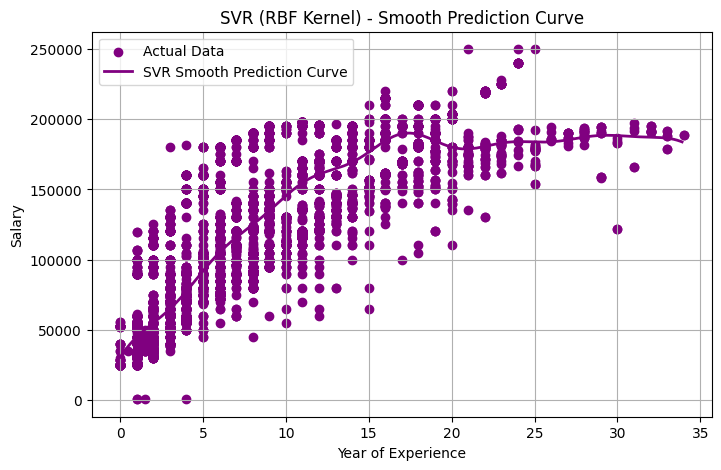

In [126]:
import numpy as np
import matplotlib.pyplot as plt
#create a fine grid betwee min and max YearExperience
x_grid = np.arange(min(x.ravel()), max(x.ravel()), 0.1)
x_grid = x_grid.reshape(-1,1)
#scale x_grid just like training data
x_grid_scaled = sc_x.transform(x_grid)
#predict on the grid and inverse tranform
y_grid_scaled = svr.predict(x_grid_scaled)
y_grid = sc_y.inverse_transform(y_grid_scaled.reshape(-1,1))

#Plot
plt.figure(figsize=(8,5))
plt.scatter(x,y, label='Actual Data', color='purple')
plt.plot(x_grid , y_grid, label='SVR Smooth Prediction Curve', color='purple',linewidth=2)
plt.title("SVR (RBF Kernel) - Smooth Prediction Curve")
plt.xlabel("Year of Experience")
plt.ylabel("Salary")
plt.grid(True)
plt.legend()
plt.show()



Evaluate Model Performance

In [127]:
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np

mse = mean_squared_error(y,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)
print("MSE:",mse)
print("RMSE:",rmse)
print("R^2 Score:",r2)

MSE: 759013901.8514212
RMSE: 27550.20692937571
R^2 Score: 0.7275580175081495


Compare Kernels using code

Kernel: LINEAR | r*r Score: 0.6326


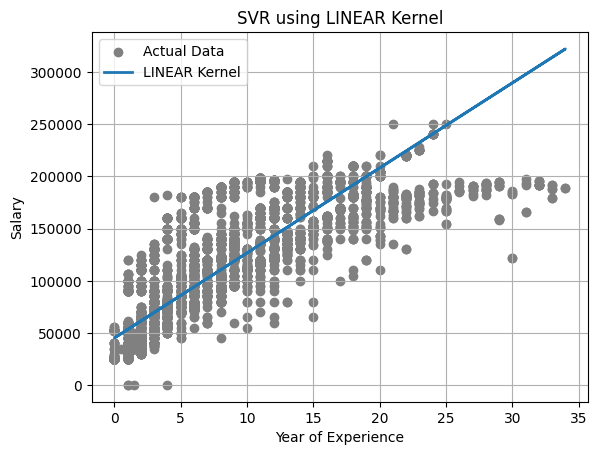

Kernel: POLY | r*r Score: 0.0578


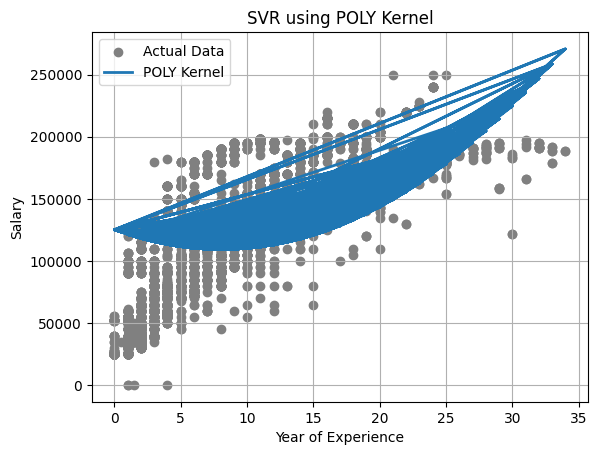

Kernel: RBF | r*r Score: 0.7249


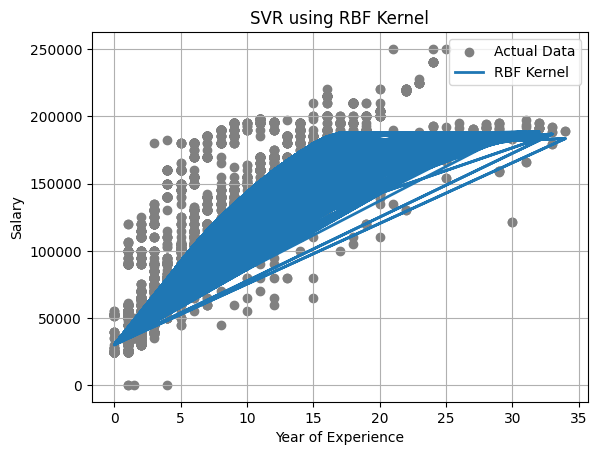

In [133]:
sc_y = StandardScaler()

x_scaled = sc_x.fit_transform(x)
y_scaled = sc_y.fit_transform(y).ravel() #flatten y

#2.Define Kernelsfrom sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

#1.Load and sacle data
x = df[['Years of Experience']].values
y = df[['Salary']].values

sc_x = StandardScaler()
sc_y = StandardScaler()

x_scaled = sc_x.fit_transform(x)
y_scaled = sc_y.fit_transform(y).ravel() #flatten y

kernels = ['linear', 'poly', 'rbf']

#3.Train and evaluate each kernel
for kernel in kernels:
    if kernel == 'poly':
       model = SVR(kernel=kernel, degree=2)
    else:
      model = SVR(kernel=kernel)

    model.fit(x_scaled, y_scaled)

    # Predict for training data
    y_pred_scaled = model.predict(x_scaled)
    y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1,1))

    # Evaluation
    score = r2_score(y,y_pred)
    print(f"Kernel: {kernel.upper()} | r*r Score: {score:.4f}")

    #plot (optional)

    plt.scatter(x,y, color='gray', label='Actual Data')
    plt.plot(x,y_pred, label=f'{kernel.upper()} Kernel', linewidth=2)
    plt.title(f'SVR using {kernel.upper()} Kernel')
    plt.xlabel("Year of Experience")
    plt.ylabel("Salary")
    plt.legend()
    plt.grid(True)
    plt.show()

Try Different C and epsilon values

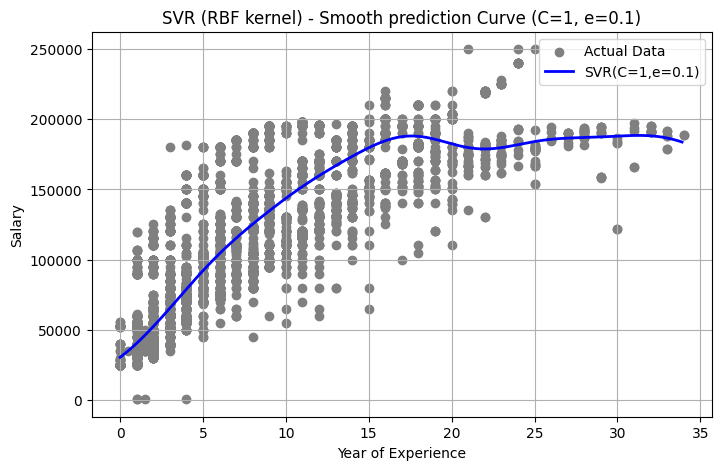

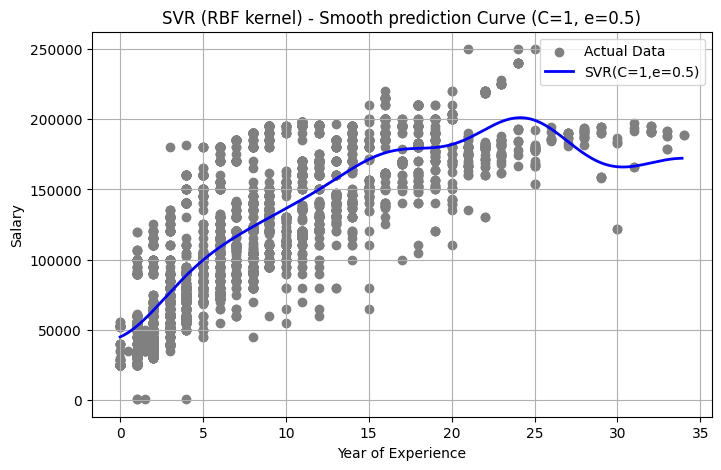

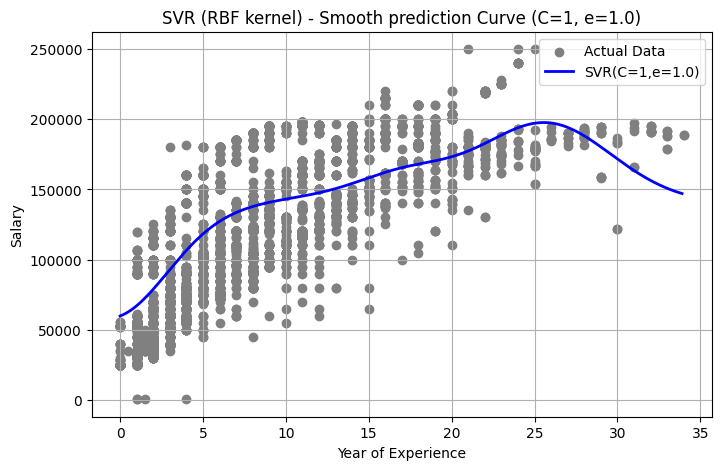

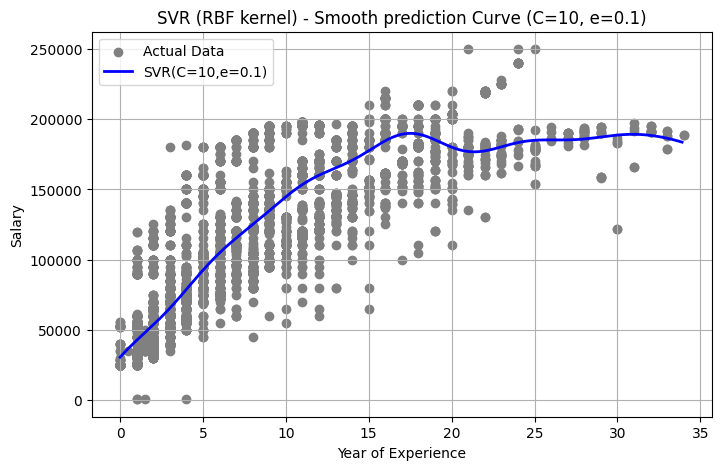

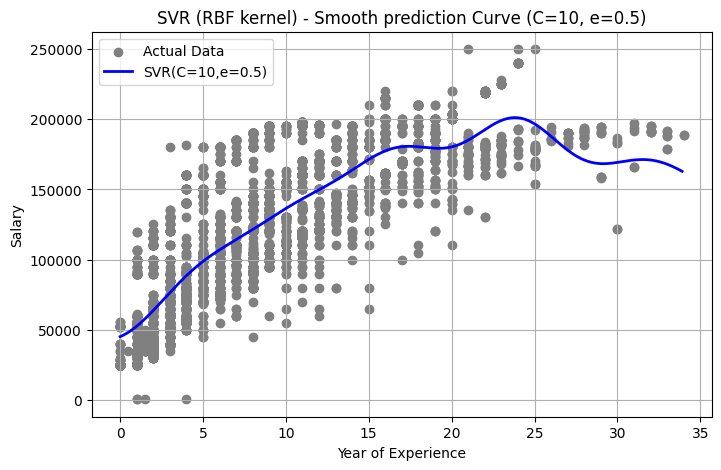

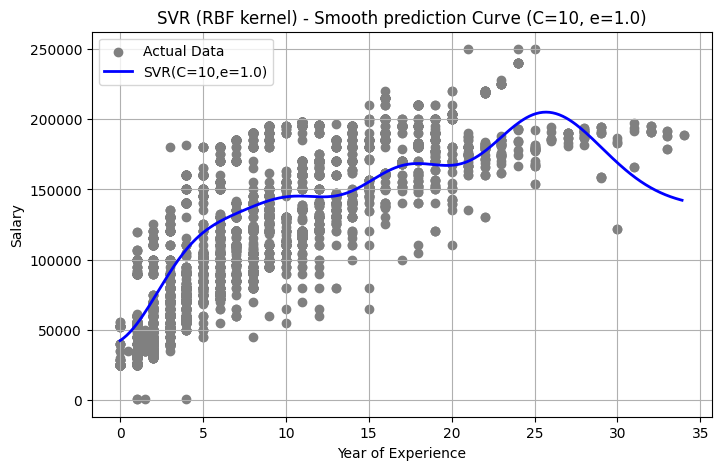

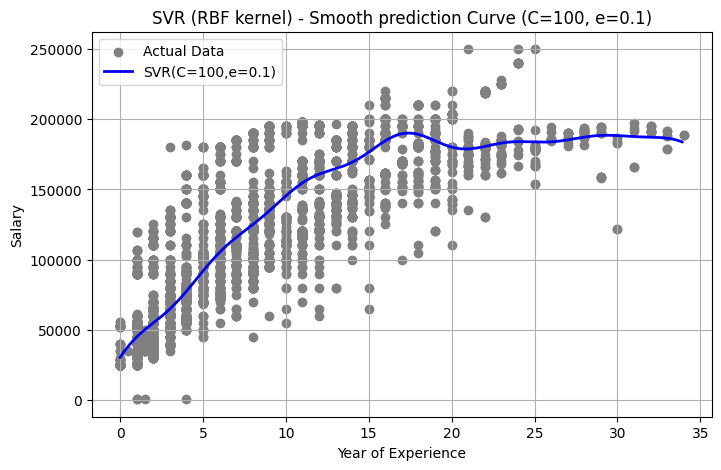

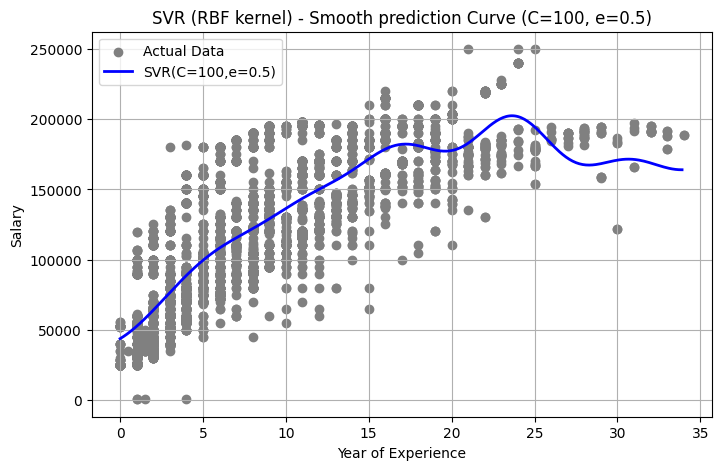

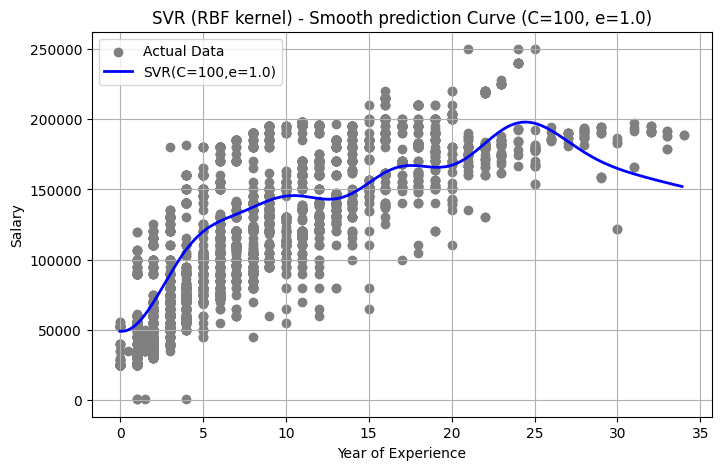

In [134]:
C_values = [1,10,100]
epsilon_values = [0.1,0.5,1.0]

x_grid = np.arange(min(x.ravel()), max(x.ravel()),0.1)
x_grid = x_grid.reshape(-1,1)

x_grid_scaled = sc_x.transform(x_grid)

for c in C_values:
  for eps in epsilon_values:
    model = SVR(kernel='rbf', C=c, epsilon=eps)
    model.fit(x_scaled, y_scaled)

    y_grid_scaled = model.predict(x_grid_scaled)
    y_grid = sc_y.inverse_transform(y_grid_scaled.reshape(-1,1))

    plt.figure(figsize=(8,5))
    plt.scatter(x,y, color='gray', label='Actual Data')
    plt.plot(x_grid,y_grid,color='blue', label=f'SVR(C={c},e={eps})', linewidth=2)
    plt.title(f"SVR (RBF kernel) - Smooth prediction Curve (C={c}, e={eps})")
    plt.xlabel("Year of Experience")
    plt.ylabel("Salary")
    plt.legend()
    plt.grid(True)
    plt.show()